<a href="https://www.kaggle.com/code/neuralroot/my-first-ml-model-titanic-ml-from-disaster?scriptVersionId=113116876" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Predicting the survival of the Titanic passengers with linear regression model

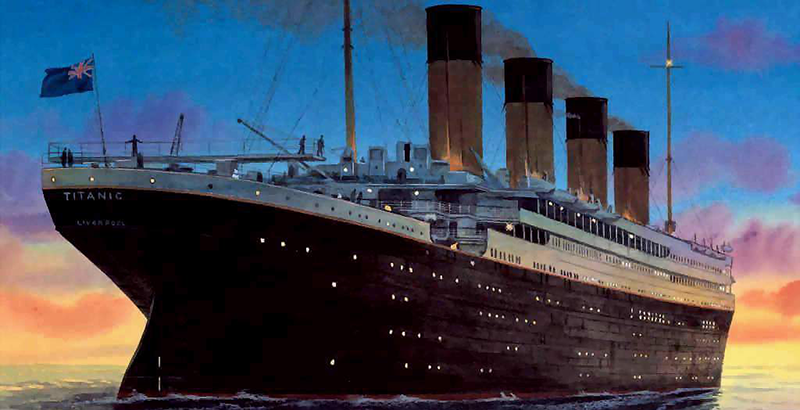

**1. Importing the necessary libraries**

In [1]:
import pandas as pd #for storing data
import seaborn as sns #for ploting the data
from sklearn.linear_model import LinearRegression #to create a linear regression model

**2. Stroring, cleaning and visualizing the data**

In [2]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")

In [3]:
df.head() #first 5 rows 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


*Encoding the text-data columns (Name,Sex,Ticket,Cabin,Embarked) to numerical values*

In [5]:
dict_names = dict(enumerate(df["Name"].astype('category').cat.categories)) #Creating a dictionary to be able to have the reference of each number with its respective value
df["Name"] = df["Name"].astype('category').cat.codes #converting the names of the df to alphanumerical values

In [6]:
dict_sex = dict(enumerate(df["Sex"].astype('category').cat.categories)) #Creating a dictionary to be able to have the reference of each number with its respective value
df["Sex"] = df["Sex"].astype('category').cat.codes #converting the sex of the df to alphanumerical values

In [7]:
dict_ticket = dict(enumerate(df["Ticket"].astype('category').cat.categories)) #Creating a dictionary to be able to have the reference of each number with its respective value
df["Ticket"] = df["Ticket"].astype('category').cat.codes #converting the sex of the df to alphanumerical values

In [8]:
dict_cabin = dict(enumerate(df["Cabin"].astype('category').cat.categories)) #Creating a dictionary to be able to have the reference of each number with its respective value
df["Cabin"] = df["Cabin"].astype('category').cat.codes #converting the sex of the df to alphanumerical values

In [9]:
dict_embarked = dict(enumerate(df["Embarked"].astype('category').cat.categories)) #Creating a dictionary to be able to have the reference of each number with its respective value
df["Embarked"] = df["Embarked"].astype('category').cat.codes #converting the sex of the df to alphanumerical values

*Now, if we want to know the real text value of a number, we can do this:*

In [10]:
dict_ticket.get(3)

'110564'

*As you can see, now there isn´t any string value in the dataframe*

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,-1,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,-1,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,-1,2


In [12]:
df.isnull().sum() #we check if is there any null value

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

*Filling the missing values for each column with the mean of the others (Age, Cabin, and Embarking)*

In [13]:
df["Age"] = df["Age"].fillna(df["Age"].mean()) 
df["Cabin"] = df["Cabin"].fillna(df["Cabin"].mean()) 
df["Embarked"] = df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mean()) 

**3. Fitting the model**

*First, we separe the features (independent variables) from the target (dependent variable)*

In [14]:
features = df.drop(["Survived"],axis=1)
target = df["Survived"]

*Now, we instantiate the Linar Regression class*

In [15]:
model_lr = LinearRegression()

*Fitting*

In [16]:
model_lr.fit(X=features.values,y=target.values) #by taking only the values of each variable, we prevent possible errors when predicting individual values without feature names

LinearRegression()

**4. Predicting with the test data**

*First, we load the test data*

In [17]:
x_test = pd.read_csv("/kaggle/input/titanic/test.csv")

*We convert the string values to numerical data*

In [18]:
x_test["Name"] = x_test["Name"].astype('category').cat.codes #converting the names of the df to alphanumerical values
x_test["Sex"] = x_test["Sex"].astype('category').cat.codes #converting the sex of the df to alphanumerical values
x_test["Ticket"] = x_test["Ticket"].astype('category').cat.codes #converting the sex of the df to alphanumerical values
x_test["Cabin"] = x_test["Cabin"].astype('category').cat.codes #converting the sex of the df to alphanumerical values
x_test["Embarked"] = x_test["Embarked"].astype('category').cat.codes #converting the sex of the df to alphanumerical values

*Also, we need to fill again the null values for this data*

In [19]:
x_test["Age"] = x_test["Age"].fillna(x_test["Age"].mean()) 
x_test["Cabin"] = x_test["Cabin"].fillna(x_test["Cabin"].mean()) 
x_test["Embarked"] = x_test["Embarked"] = x_test["Embarked"].fillna(x_test["Embarked"].mean()) 
x_test["Fare"] = x_test["Fare"] = x_test["Fare"].fillna(x_test["Fare"].mean()) 

*Then, we predict the survival "y" values for this data*

In [20]:
x_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,206,1,34.5,0,0,152,7.8292,-1,1
1,893,3,403,0,47.0,1,0,221,7.0000,-1,2
2,894,2,269,1,62.0,0,0,73,9.6875,-1,1
3,895,3,408,1,27.0,0,0,147,8.6625,-1,2
4,896,3,178,0,22.0,1,1,138,12.2875,-1,2


In [21]:
pred = model_lr.predict(x_test.values).astype(int)

**5. Making the csv file**

In [22]:
output = pd.DataFrame({'PassengerId': x_test["PassengerId"], 'Survived': pred})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
